# Israel Covid19 Overview

**This dataset contains coronavirus data from Israel**.
* The purpose of this notebook is to show a little bit of the data 
and what can be learned and deduced from it.

# IMPORTING MODULES

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import dates
import plotly.express as px
import plotly.graph_objects as go

# Load our Data.

In [2]:
vaccination_df = pd.read_csv('../input/israel-coronavirus-dataset/Number of vaccinators daily.csv' , index_col=0)
case_df = pd.read_csv('../input/israel-coronavirus-dataset/corona_age_and_gender.csv' , index_col=0)
Deaths_critical_df = pd.read_csv('../input/israel-coronavirus-dataset/Deaths and hospitalized.csv' , index_col=0)

**Let's take a look at the data and what each Dataframe contains**

In [3]:
case_df.head()

,last_week_day,age_group,gender,weekly_tests_num,weekly_cases,weekly_deceased
first_week_day,,,,,,
15/03/2020,21/03/2020,0-19,Men,1115,44,0
15/03/2020,21/03/2020,0-19,Not Binary,0,0,0
15/03/2020,21/03/2020,0-19,Women,1065,39,0
15/03/2020,21/03/2020,20-24,Men,613,92,0
15/03/2020,21/03/2020,20-24,Not Binary,0,0,0


In [4]:
Deaths_critical_df.head()

,Daily_numbe_ of_deaths,new _critical_cases,Hospitalized_in_critical_condition
Date,,,
02-03-2020,0,0,0
03-03-2020,0,0,0
04-03-2020,0,0,0
05-03-2020,0,1,1
06-03-2020,0,1,2


In [5]:
vaccination_df.head()


,Vaccinate first dose,Vaccinate a second dose,Vaccinate a third dose
Date,,,
19-12-2020,45,0,0
20-12-2020,7382,0,0
21-12-2020,24903,0,0
22-12-2020,44632,0,0
23-12-2020,62879,0,0


**Let us first look at the morbidity data by age groups without gender distinction.**

In [6]:
case_df.index= pd.to_datetime(case_df.index, format = '%d/%m/%Y')

age_group_case_df =  case_df.groupby(['first_week_day','age_group']).sum()

In [7]:
age_group_case_df

weekly_tests_num  weekly_cases  weekly_deceased
first_week_day age_group                                                 
2020-03-15     0-19                   2180            83                0
               20-24                  1323           142                0
               25-29                  1321            98                0
               30-34                  1254            82                0
               35-39                  1060            75                0
...                                    ...           ...              ...
2021-10-24     60-64                 21561            69                0
               65-69                 17480            52                0
               70-74                 13940            24                0
               75-79                  7488             0                0
               80+                   13194            22                0

[1190 rows x 3 columns]

 # Weekly morbidity data without division into age groups


**The graph shows the four waves of Covid19 that have occurred in Israel in the past year and a half**

In [8]:

fig = px.line( case_df.groupby('first_week_day').sum(), y = 'weekly_cases', title='Israel covid19')
fig.show()

# Weekly morbidity data by age groups

<AxesSubplot:xlabel='first_week_day', ylabel='weekly_cases'>

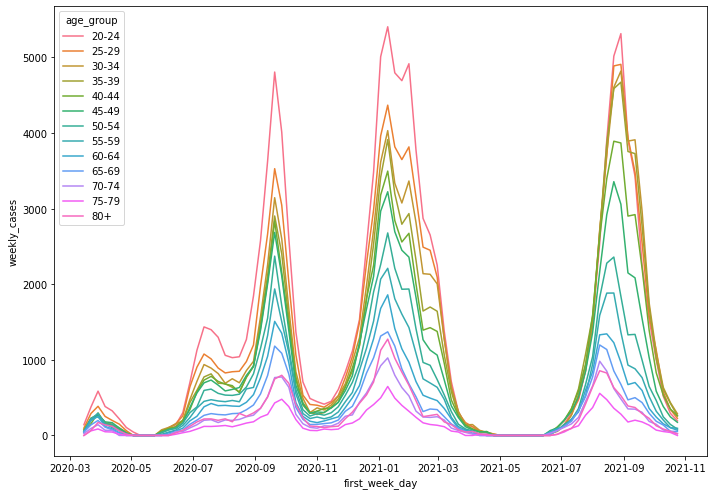

In [9]:
from matplotlib import pyplot

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(ax=ax,data=age_group_case_df.drop('0-19', level=1), hue='age_group', x='first_week_day', y='weekly_cases')


In [10]:
fig = go.Figure()
ages = ['20-24', '25-29','30-34', '35-39','40-44', '45-49','50-54', '55-59','60-64', '65-69','70-74', '75-79','80+']

for age in ages:
    fig.add_trace(go.Violin(x=case_df['age_group'][case_df['age_group'] == age],
                            y=case_df['weekly_cases'][case_df['age_group'] == age],
                            name=age,
                            box_visible=True,
                            meanline_visible=True))

fig.show()

# Severe morbidity and mortality

In [11]:
fig = px.line( Deaths_critical_df.drop(columns='Hospitalized_in_critical_condition'), title='Deaths and critical cases')
fig.show()

# The Israeli vaccination campaign.

In [12]:


pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
vaccination_df.index= pd.to_datetime(vaccination_df.index, format = '%d-%m-%Y')

fig = px.line(vaccination_df, title='Israel Vaccination campain')
fig.show()

Below I would like to add graphs and analyzes on the effectiveness of vaccines and the percentage of severe morbidity by age
# I would love to receive comments to improve my code and the dataset